# Project: Investigate No-show appointments

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I chose the dataset of No-show appointments This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
We have some questions that needs to be answered 
- What is the most dieasese that prevents people from attending ?
- Are all people who recieved SMS attended  the appointments ? 
- Do most old people over 65 don't attend the appointments ? 
- What is the most Neighbourhood that don't show up for the appointments ?
- Are women better than men in showing up for the appointments ?

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Data Scientist\Downloads\investigate a dataset/datset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Exploratory Data Analysis

In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Some histograms to help us in understanding the schema of the data 

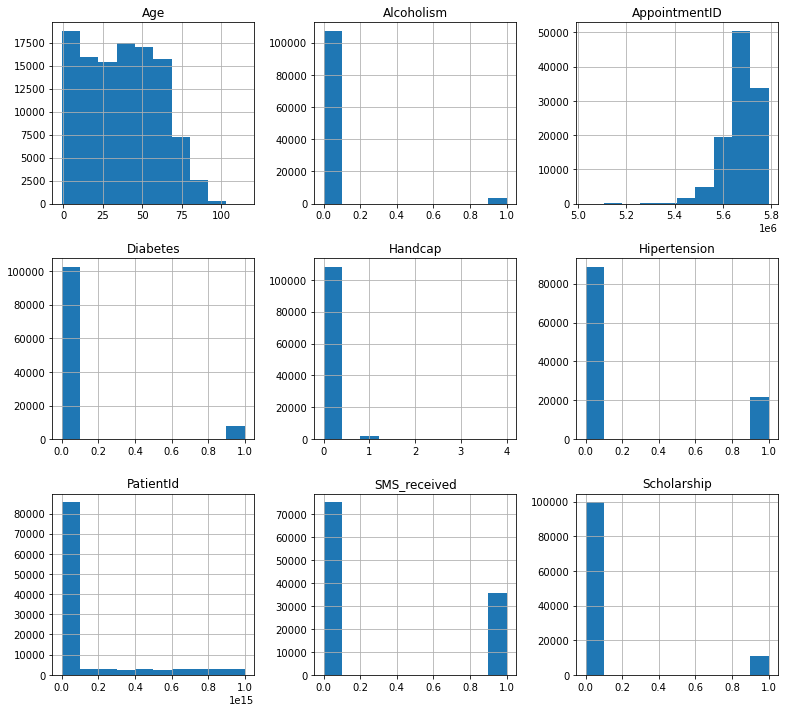

In [5]:
df.hist(figsize=(13, 12));

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Data Cleaning

checking if there is ages = zero

In [7]:
zeros = df['Age'] == 0
print (zeros.sum())

3539


Drpoing the zeros and negative values in Age column

In [8]:
df = df[(df['Age'] >= 1)]

checking again if there is ages = zero

In [9]:
zeros = df['Age'] == 0
print (zeros.sum())

0


the handcaps column seems to have more values than 1 

In [10]:
df['Handcap'].value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: Handcap, dtype: int64

Converting to bool to fix this rpoblem 

In [11]:
# 
df['Handcap'] = df['Handcap'].astype('bool')
df['Handcap'].value_counts()

False    104747
True       2240
Name: Handcap, dtype: int64

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


changing the name of this column beacuse it caused some problems 

In [13]:
df.rename(columns = {'No-show' : 'No_show'}, inplace = True)

cheking if there is duplicated rows

In [14]:
df.duplicated().sum()

0

Droping the columns that i Won't use as the id of the patients, scholarships and appointemts won't benifit us much

In [15]:
df.drop(['PatientId', 'AppointmentID', 'Scholarship'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          106987 non-null  object
 1   ScheduledDay    106987 non-null  object
 2   AppointmentDay  106987 non-null  object
 3   Age             106987 non-null  int64 
 4   Neighbourhood   106987 non-null  object
 5   Hipertension    106987 non-null  int64 
 6   Diabetes        106987 non-null  int64 
 7   Alcoholism      106987 non-null  int64 
 8   Handcap         106987 non-null  bool  
 9   SMS_received    106987 non-null  int64 
 10  No_show         106987 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 9.1+ MB


Creating No shows column that contains yes values from the original column and that will beniift us in making masks part

In [17]:
df['No_shows'] = df['No_show'] == 'Yes'

###### Creating some vaiables to use them as filters for the analysis later and this will help us to understand the data more

As we will use this process many times we do it with def function

In [18]:
def show_statics (disease_column):
    var_name = df.groupby(['No_shows'])[disease_column]
    print ('Statics of', disease_column)
    print (var_name.sum())
    print ('------------------')
    

In [19]:
def show_percentage (disease, yes_number, total_number):
    print ('- There is', ((yes_number/total_number) * 100), '%', "of", disease, "not showing up for the appointments") 

In [20]:
show_statics ('Diabetes')
show_statics ('Hipertension')
show_statics ('Handcap')
show_statics ('Alcoholism')

Statics of Diabetes
No_shows
False    6513
True     1430
Name: Diabetes, dtype: int64
------------------
Statics of Hipertension
No_shows
False    18029
True      3772
Name: Hipertension, dtype: int64
------------------
Statics of Handcap
No_shows
False    1833.0
True      407.0
Name: Handcap, dtype: float64
------------------
Statics of Alcoholism
No_shows
False    2683
True      677
Name: Alcoholism, dtype: int64
------------------


### What is the most dieasese that prevents people from attending ?

  As we will use this steps many times I will define a function to do this 
  I couldn't do this step with 100% def function so i filled the variables dependind on reseults up 

In [21]:
df.groupby("No_shows")[['Diabetes', 'Handcap', 'Hipertension', 'Alcoholism']].sum().apply(lambda x: round((x*100)/x.sum(),2))

,Diabetes,Handcap,Hipertension,Alcoholism
No_shows,,,,
False,82.0,81.83,82.7,79.85
True,18.0,18.17,17.3,20.15


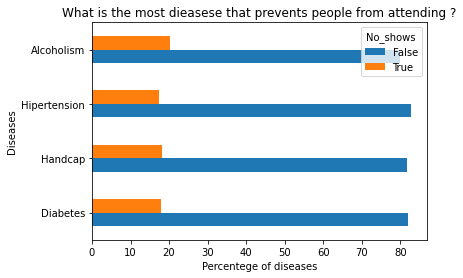

In [22]:
df.groupby('No_shows')[['Diabetes', 'Handcap', 'Hipertension', 'Alcoholism']].sum().apply(lambda x: round((x*100)/x.sum(),2)).T.plot.barh(rot=0);
plt.title("What is the most dieasese that prevents people from attending ?");
# include x label
plt.xlabel("Percentege of diseases");
# include y label
plt.ylabel("Diseases");

- From the analysis I found that largest amount of people who didn't show up for the appointments are the Alcoholisms people with percentage of 20.15% although results are convergent

### Are all people who recieved SMS attended  the appointments? 

In [23]:
show_statics ('SMS_received')

Statics of SMS_received
No_shows
False    25017
True      9568
Name: SMS_received, dtype: int64
------------------


In [24]:
show_percentage ("SMS_received",9568, 34585 )

- There is 27.665172762758424 % of SMS_received not showing up for the appointments


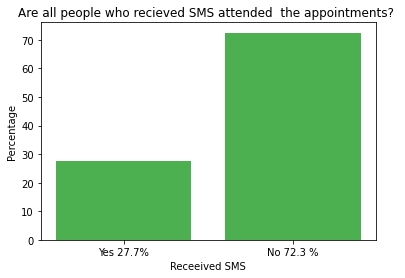

In [25]:
x = np.array(["Yes 27.7%", "No 72.3 %"])
y = np.array([27.5, 72.5])
plt.title("Are all people who recieved SMS attended  the appointments? ")
# include x label
plt.xlabel("Receeived SMS")
# include y label
plt.ylabel("Percentage")


plt.bar(x, y, color = "#4CAF50")
plt.show()


- I thought that at least 70% of the poeple who received SMS will show up for the appointments but surprisingly sending SMS didn't helped much as only 27.57% of poeple who received SMS showed up for the appointments

### Do most old people over 65 don't attend the appointments ? 

In [26]:
df['old'] = df['Age'] > 65

In [27]:
old_people = df.groupby(['No_show'])['old']
print (old_people.sum())
print ('Percentage =',(2066/13301) * 100 , '%')

No_show
No     11235.0
Yes     2066.0
Name: old, dtype: float64
Percentage = 15.532666716788214 %


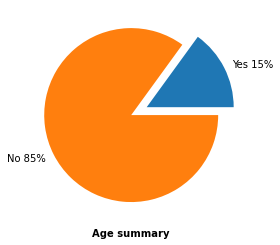

In [28]:
y = np.array([15, 85])
mylabels = ["Yes 15%", "No 85%"]
myexplode = [0.2, 0]
plt.xlabel('Age summary', fontweight='bold')

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

- This statistic surprised me alot as i thought that old people must be lazy or tired for showing up for the appointments but surprisingly around 84.57% of poeple over 65 are attending the appointments and maybe beacause they have a lot of diseases unlike the young as their health is much better than pepople over 65 

### What is the most Neighbourhood that don't show up for the appointments ?

In [29]:
NO_show = df.groupby(['Neighbourhood'])['No_shows']
print (NO_show.sum())

Neighbourhood
AEROPORTO                1.0
ANDORINHAS             509.0
ANTÔNIO HONÓRIO         45.0
ARIOVALDO FAVALESSA     61.0
BARRO VERMELHO          91.0
                       ...  
SÃO JOSÉ               407.0
SÃO PEDRO              497.0
TABUAZEIRO             552.0
UNIVERSITÁRIO           32.0
VILA RUBIM             139.0
Name: No_shows, Length: 81, dtype: float64


- The most Neighbourhood is JARDIM CAMBURI
Maybe this neighbourhood have fewer poeple then other neighbourhoods or there is plenty means of transports 
- The least Neighbourhood is AEROPORTO
Maybe this neighbourhood have much more poeple or the citizens are poor and don't care for their health or there is no many means of tranports and I think the brazilian government should take care of this neighbourhood as it needs much attentsion

### Are women better than men in showing up for the appointments ?

In [30]:
df.groupby(['No_shows', "Gender"]).size().unstack().apply(lambda x: round((x*100)/x.sum(),2)).T

No_shows,False,True
Gender,,
F,79.64,20.36
M,79.92,20.08


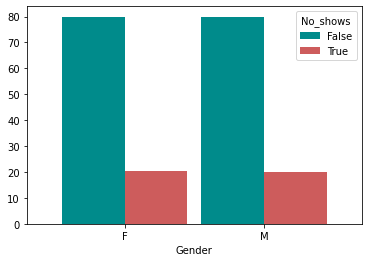

In [31]:
df.groupby(['No_shows', "Gender"]).size().unstack().apply(lambda x: round((x*100)/x.sum(),2)).T.plot.bar(rot=0, color = ['#008B8B', '#CD5C5C'], width = 0.9);

- As u can see results are almost idnetical , women are equal to men in not showing up for the aoopintments


## Limitations


- Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not , or whether the patient have a series medical issue or not.
- there we some illogical data such as patients with age 0 or less
- The scope of this analysis is limited to the setting in which the data has been gathered. Any findings or trends cannot be induced to a larger population or to another setting.
- There is no way to know if SMS message was sent a long time before the appointment date or no as sending SMS didn't helped much 

# Coclusions

- elder people don't seems that they miss the appointments 
- Most of the Handcapes people don't show up for the appointemnts so that they must make appointments easier fot them
- There is a big differnece in showing up ratio for the Neighbourhoods they must take more care of AEROPORTO as it has the biggest rate for not shwowing up for the appointments
- There is no difference between men and women in attending the appointments


## sources helped me 
- https://towardsdatascience.com/matplotlib-cheat-sheet-f441c43971c4
- https://www.programiz.com/python-programming/function
- https://python-graph-gallery.com/11-grouped-barplot/
- https://stackoverflow.com/questions/24214941/python-pandas-dataframe-filter-negative-values
- https://htmlcolorcodes.com/color-names/